In [1]:
import gpib

In [3]:
%matplotlib inline
#reload(gpib)
gpib1 = 'GPIB0::12::INSTR'
gpib2 = 'GPIB0::13::INSTR'
cnd = gpib.Conductivity(gpib1,gpib2)
path = '/Users/nakayamahidenori/UCSB_data/conductivity'

r, df = cnd.measure?

6220 confirmed
2400 confirmed


"no5_01" is an unique filename!
est. meas time : 10 [s]
R = 1.04e+04 [Ohm]


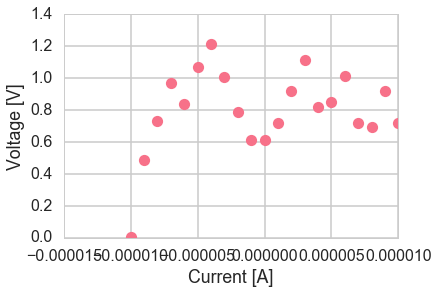

In [4]:
r, df = cnd.measure(path, 'no5_01', curr_start=-1e-5, curr_stop=1e-5, curr_step=1e-6, nplc=10,v_cmpl=50)

IV measurement without Green LED light. Bad contact or too high registivity?

Then let's see the basic iv scan useing KE2400

In [6]:
k2400 = gpib.KE2400(gpib2)

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1386470,C32   Oct  4 2010 14:20:11/A02  /S/K

2400 confirmed


Hey! "No5_iv01" alrady exists in this directory!!
Enter a new name: No5_iv01_2
"No5_iv01_2" is an unique filename!
est. scan time = 1 [s]


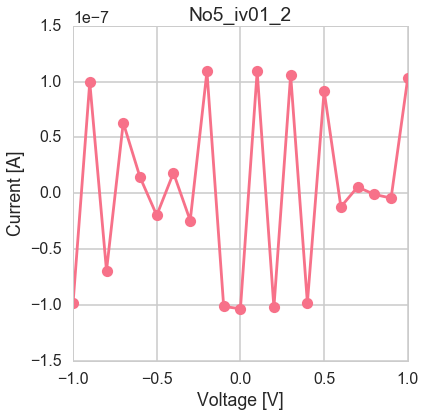

In [8]:
iv = k2400.iv_sweep(path, 'No5_iv01', -1, 1, 0.1, nplc=10)

"No5_iv02" is an unique filename!
est. scan time = 3 [s]


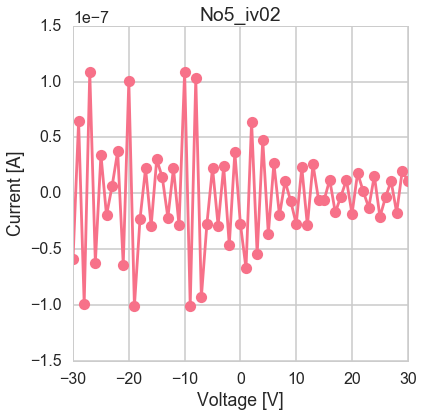

In [9]:
iv = k2400.iv_sweep(path, 'No5_iv02', -30, 30, 1, nplc=10)

"No5_iv03_light" is an unique filename!
est. scan time = 3 [s]


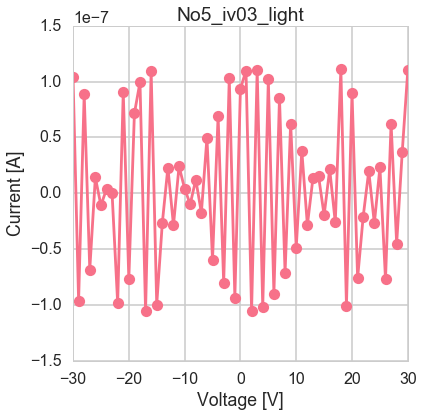

In [10]:
#Now the light is on
iv = k2400.iv_sweep(path, 'No5_iv03_light', -30, 30, 1, nplc=10)

No change. Double-check the tip contacts.

"No5_iv04_light" is an unique filename!
est. scan time = 5 [s]


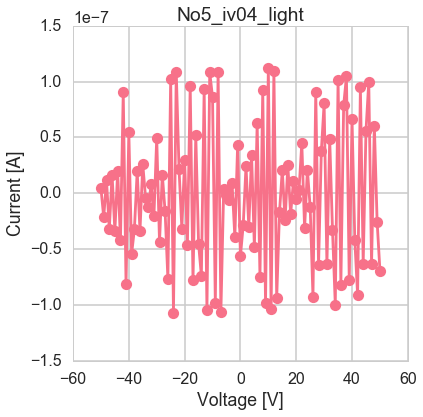

In [11]:
#The light is on
iv = k2400.iv_sweep(path, 'No5_iv04_light', -50, 50, 1, nplc=10)

Hey! "No5_iv04_light" alrady exists in this directory!!
Enter a new name: No5_iv05_dark
"No5_iv05_dark" is an unique filename!
est. scan time = 5 [s]


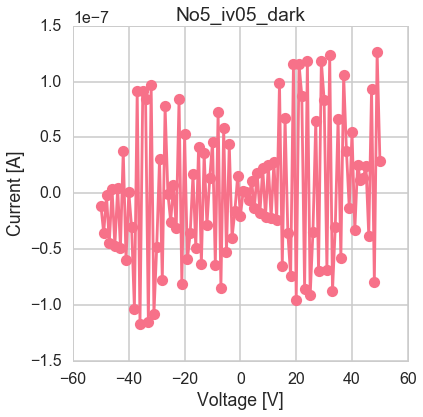

In [12]:
#The voltage probe is now on adjoining strips. No light.
iv = k2400.iv_sweep(path, 'No5_iv04_light', -50, 50, 1, nplc=10)

Well, it seems I now see the current. Let's turn the light on.

Hey! "No5_iv04_light" alrady exists in this directory!!
Enter a new name: No5_iv05_light
"No5_iv05_light" is an unique filename!
est. scan time = 5 [s]


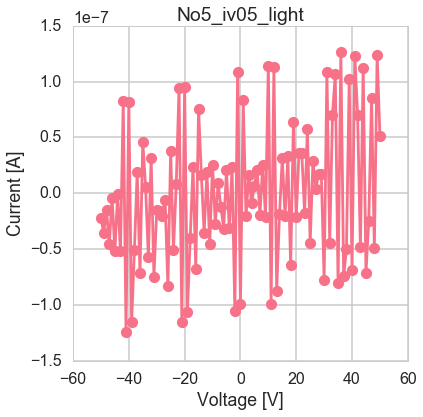

In [13]:
#The voltage probe is now on adjoining strips. With light
iv = k2400.iv_sweep(path, 'No5_iv04_light', -50, 50, 1, nplc=10)

The conductivity might be better, but the difference is not very clear.

Now, try four-probe measurement with KE6220. The current probe is on the same strip with the voltage strip.

"No5_iv06_four_dark" is an unique filename!
est. meas time : 10 [s]
R = -1.56e+06 [Ohm]


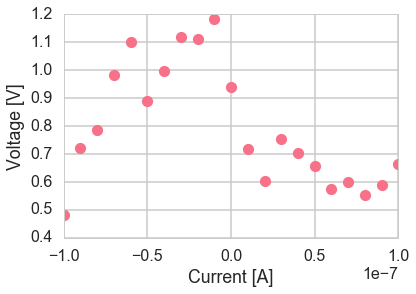

In [14]:
r, df = cnd.measure(path, 'No5_iv06_four_dark', curr_start=-1e-7, curr_stop=1e-7, curr_step=1e-8, nplc=10,v_cmpl=100)

Did the current flow? Let's see the result with no current probe contact.

"No5_iv06_four_dark2_nocontact" is an unique filename!
est. meas time : 10 [s]
R = 1.48e+06 [Ohm]


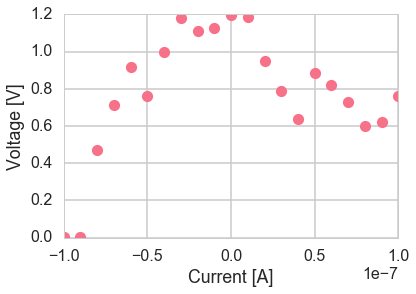

In [15]:
r, df = cnd.measure(path, 'No5_iv06_four_dark2_nocontact', curr_start=-1e-7, curr_stop=1e-7, curr_step=1e-8, nplc=10,v_cmpl=100)

Is this because the KE6220 hit the voltage compliance?

Hey! "No5_iv06_four_dark2_nocontact" alrady exists in this directory!!
Enter a new name: No5_iv06_four_dark2_nocontact2
"No5_iv06_four_dark2_nocontact2" is an unique filename!
est. meas time : 10 [s]
R = -4.86e+07 [Ohm]


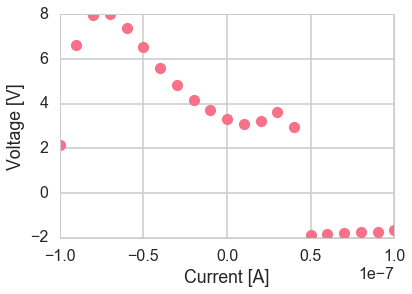

In [17]:
r, df = cnd.measure(path, 'No5_iv06_four_dark2_nocontact', curr_start=-1e-7,
                    curr_stop=1e-7, curr_step=1e-8, nplc=10,v_cmpl=100, c_cmpl=105)

This is done with the current probe contacted. Why this happened??? Very weird. Try with smaller current

"No5_iv06_four_dark3_nocontact" is an unique filename!
est. meas time : 5 [s]
R = -4.48e+07 [Ohm]


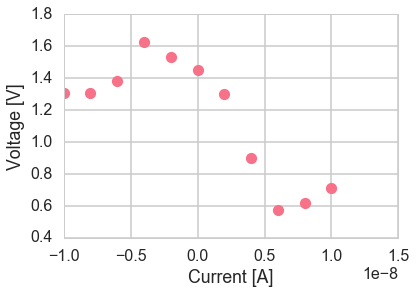

In [18]:
r, df = cnd.measure(path, 'No5_iv06_four_dark3_nocontact', curr_start=-1e-8,
                    curr_stop=1e-8, curr_step=2e-9, nplc=10,v_cmpl=100, c_cmpl=105)

In [19]:
r, df = cnd.measure(path, 'No5_iv06_four_dark3_nocontact', curr_start=-5e-8,
                    curr_stop=5e-8, curr_step=2e-9, nplc=10,v_cmpl=100, c_cmpl=105)

Hey! "No5_iv06_four_dark3_nocontact" alrady exists in this directory!!
Enter a new name: No5_iv06_four_dark4_nocontact
"No5_iv06_four_dark4_nocontact" is an unique filename!
est. meas time : 26 [s]


ValueError: On entry to DGELSD parameter number 4 had an illegal value

Error. Maybe because the  linear regression failed.

In [20]:
print df

    Inpt_current   Voltage       Current    Registance      Time   Status
0  -1.000000e-08  1.306292  4.595409e-11  9.910000e+37  607780.7  39940.0
1  -8.000000e-09  1.304938  4.626011e-11  9.910000e+37  607781.4  39940.0
2  -6.000000e-09  1.380597  4.553762e-11  9.910000e+37  607782.1  39940.0
3  -4.000000e-09  1.625202  4.657122e-11  9.910000e+37  607782.8  39940.0
4  -2.000000e-09  1.533888  4.668164e-11  9.910000e+37  607783.4  39940.0
5   0.000000e+00  1.453513  4.691246e-11  9.910000e+37  607784.1  39940.0
6   2.000000e-09  1.298058  4.754469e-11  9.910000e+37  607784.8  39940.0
7   4.000000e-09  0.896549  4.765513e-11  9.910000e+37  607785.4  39940.0
8   6.000000e-09  0.570661  4.775548e-11  9.910000e+37  607786.1  39940.0
9   8.000000e-09  0.614283  4.729385e-11  9.910000e+37  607786.8  39940.0
10  1.000000e-08  0.713373  4.708313e-11  9.910000e+37  607787.5  39940.0


"No5_iv07_dark" is an unique filename!
est. scan time = 5 [s]


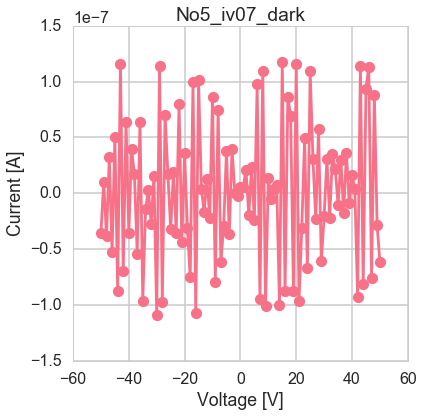

In [21]:
#two-probe measurement again
iv = k2400.iv_sweep(path, 'No5_iv07_dark', -50, 50, 1, nplc=10)

Hey! "No5_iv09_four_dark1" alrady exists in this directory!!
Enter a new name: No5_iv09_four_dark2
"No5_iv09_four_dark2" is an unique filename!
est. meas time : 10 [s]
R = 3.89e+07 [Ohm]


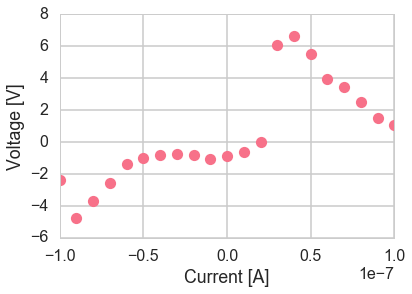

In [25]:
reload(gpib)
#using four strpes, C,V,V,C probe configuration
r, df = cnd.measure(path, 'No5_iv09_four_dark1', curr_start=-1e-7,
                    curr_stop=1e-7, curr_step=1e-8, nplc=10,v_cmpl=100, c_cmpl=105)

In [26]:
r, df = cnd.measure(path, 'No5_iv09_four_dark1', curr_start=-5e-8,
                    curr_stop=5e-8, curr_step=2e-9, nplc=10,v_cmpl=100, c_cmpl=105)

Hey! "No5_iv09_four_dark1" alrady exists in this directory!!
Enter a new name: No5_iv09_four_dark3
"No5_iv09_four_dark3" is an unique filename!
est. meas time : 26 [s]


ValueError: On entry to DGELSD parameter number 4 had an illegal value

"No5_iv09_four_dark4" is an unique filename!
est. meas time : 21 [s]
R = 9.06e+07 [Ohm]


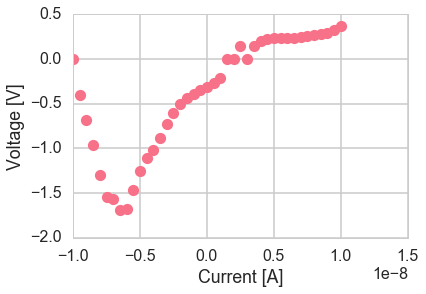

In [27]:
r, df = cnd.measure(path, 'No5_iv09_four_dark4', curr_start=-1e-8,
                    curr_stop=1e-8, curr_step=5e-10, nplc=10,v_cmpl=100, c_cmpl=105)

Hey! "No5_iv09_four_dark4" alrady exists in this directory!!
Enter a new name: No5_iv09_four_dark5
"No5_iv09_four_dark5" is an unique filename!
est. meas time : 21 [s]
R = 1.15e+07 [Ohm]


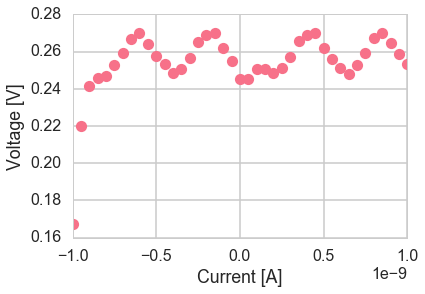

In [28]:
r, df = cnd.measure(path, 'No5_iv09_four_dark4', curr_start=-1e-9,
                    curr_stop=1e-9, curr_step=5e-11, nplc=10,v_cmpl=100, c_cmpl=105)

Hey! "No5_iv09_four_dark5" alrady exists in this directory!!
Enter a new name: No5_iv09_four_dark6
"No5_iv09_four_dark6" is an unique filename!
est. meas time : 21 [s]
R = -1.52e+07 [Ohm]


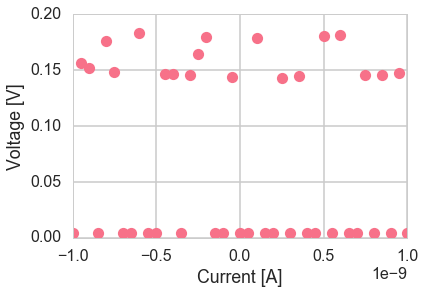

In [29]:
r, df = cnd.measure(path, 'No5_iv09_four_dark5', curr_start=-1e-9,
                    curr_stop=1e-9, curr_step=5e-11, nplc=10,v_cmpl=100, c_cmpl=105)

"No5_iv09_four_dark7" is an unique filename!
est. meas time : 2 [s]
R = 6.31e+06 [Ohm]


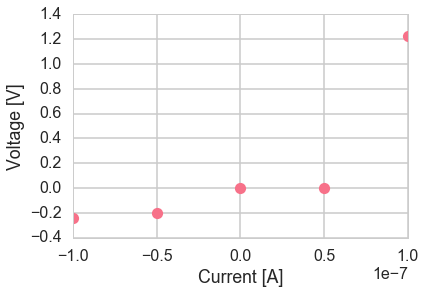

In [30]:
r, df = cnd.measure(path, 'No5_iv09_four_dark7', curr_start=-1e-7,
                    curr_stop=1e-7, curr_step=5e-8, nplc=10,v_cmpl=100, c_cmpl=105)

Hey! "No5_iv09_four_dark7" alrady exists in this directory!!
Enter a new name: No5_iv09_four_dark8
"No5_iv09_four_dark8" is an unique filename!
est. meas time : 10 [s]
R = 1.27e+06 [Ohm]


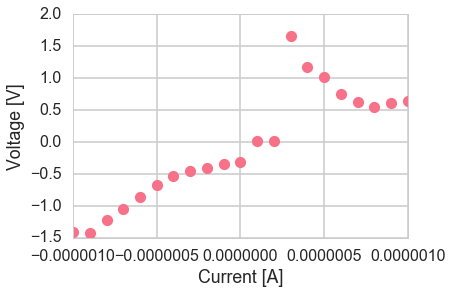

In [31]:
r, df = cnd.measure(path, 'No5_iv09_four_dark7', curr_start=-1e-6,
                    curr_stop=1e-6, curr_step=1e-7, nplc=10,v_cmpl=100, c_cmpl=105)

"No5_iv09_four_dark9" is an unique filename!
est. meas time : 10 [s]
R = 1.60e+05 [Ohm]


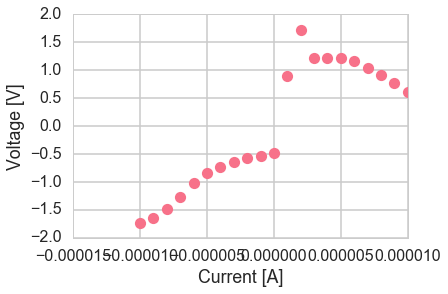

In [32]:
r, df = cnd.measure(path, 'No5_iv09_four_dark9', curr_start=-1e-5,
                    curr_stop=1e-5, curr_step=1e-6, nplc=10,v_cmpl=100, c_cmpl=105)

"No5_iv09_four_dark10_nocontact" is an unique filename!
est. meas time : 10 [s]
R = -1.20e+06 [Ohm]


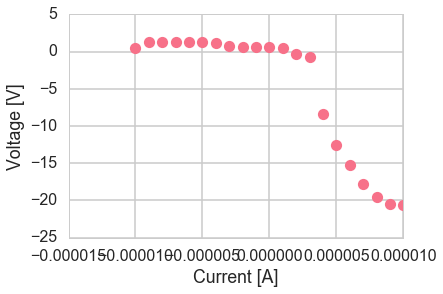

In [33]:
r, df = cnd.measure(path, 'No5_iv09_four_dark10_nocontact', curr_start=-1e-5,
                    curr_stop=1e-5, curr_step=1e-6, nplc=10,v_cmpl=100, c_cmpl=105)

"No5_iv09_four_dark10_nocontact2" is an unique filename!
est. meas time : 10 [s]
R = -1.82e+06 [Ohm]


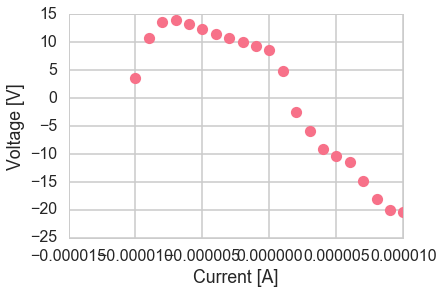

In [34]:
r, df = cnd.measure(path, 'No5_iv09_four_dark10_nocontact2', curr_start=-1e-5,
                    curr_stop=1e-5, curr_step=1e-6, nplc=10,v_cmpl=100, c_cmpl=105)